In [1]:
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator
import numpy as np

In [2]:
from scipy.constants import pi ,sigma, c, h, k

In [3]:
# Luminosity =  3.846e26
Lsun = 3.846e26
Rsun = 696340e3
Msun = 1989e30
lmbda1 = np.logspace(np.log10(4e-7), np.log10(7e-7), 900)
logMarray = np.arange(-3,2,0.01)
Ms = 10**logMarray*Msun
print(Ms)

[1.98900000e+30 2.03532976e+30 2.08273868e+30 2.13125190e+30
 2.18089513e+30 2.23169471e+30 2.28367755e+30 2.33687124e+30
 2.39130396e+30 2.44700459e+30 2.50400264e+30 2.56232836e+30
 2.62201265e+30 2.68308717e+30 2.74558430e+30 2.80953718e+30
 2.87497970e+30 2.94194658e+30 3.01047332e+30 3.08059626e+30
 3.15235256e+30 3.22578028e+30 3.30091836e+30 3.37780662e+30
 3.45648585e+30 3.53699775e+30 3.61938501e+30 3.70369131e+30
 3.78996137e+30 3.87824091e+30 3.96857674e+30 4.06101677e+30
 4.15561000e+30 4.25240660e+30 4.35145787e+30 4.45281634e+30
 4.55653576e+30 4.66267111e+30 4.77127868e+30 4.88241603e+30
 4.99614211e+30 5.11251721e+30 5.23160304e+30 5.35346273e+30
 5.47816089e+30 5.60576365e+30 5.73633866e+30 5.86995515e+30
 6.00668397e+30 6.14659762e+30 6.28977027e+30 6.43627784e+30
 6.58619801e+30 6.73961027e+30 6.89659596e+30 7.05723831e+30
 7.22162251e+30 7.38983571e+30 7.56196709e+30 7.73810793e+30
 7.91835162e+30 8.10279373e+30 8.29153204e+30 8.48466663e+30
 8.68229990e+30 8.884536

Trapist1 Luminosity = 0.05% of Solar Luminosity
Kepler-186 = 0.055 of Solar Luminosity

In [4]:
def m_to_l(Mstar):
    if Mstar<0.43*Msun:
        Lstar = Lsun*0.23*(Mstar/Msun)**2.3
    elif 0.43*Msun<Mstar<2*Msun:
        Lstar = Lsun*(Mstar/Msun)**4
    elif 2*Msun<Mstar<55*Msun:
        Lstar = Lsun*1.4*(Mstar/Msun)**3.5
    elif Mstar>55*Msun:
        Lstar = Lsun*32000*(Mstar/Msun)
    return Lstar

In [5]:
xs = [m_to_l(Mstar) for Mstar in Ms]
#list comprehension


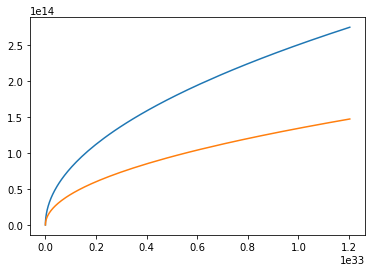

In [6]:
LiquidwaterTempLower = 273.15 #Kelvin
# xs =  [0.0005*Lsun,0.055*Lsun , Lsun, 10*Lsun]
Ds = []
for Lstar in xs:
    D = np.sqrt((Lstar)/(16*(LiquidwaterTempLower**4)*pi*sigma))
    Ds.append(D)
plt.plot(xs, Ds)   
LiquidwaterTempUpper = 373.15 #Kelvin
Ds = []
for Lstar in xs:
    D = np.sqrt((Lstar)/(16*(LiquidwaterTempUpper**4)*pi*sigma))
    Ds.append(D)
plt.plot(xs, Ds) 

2140385821645214.8


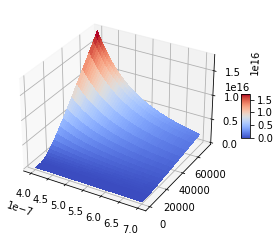

In [7]:
TemperatureofPlanet = 300 #Kelvin
Ds = []
Rs = []
Ts = []
all_Plancks = []
IntegralofIntensity1 = []
FluxPARArray = []

for Lstar in xs:
    D = np.sqrt((Lstar)/(16*(TemperatureofPlanet**4)*pi*sigma))
    Ds.append(D)
    Mstar = Msun*((Lstar/Lsun)**(1/3.5))
    if Mstar<Msun:
        Rstar = Rsun*(Mstar/Msun)**(0.8)
    else:
        Rstar = Rsun*(Mstar/Msun)**(0.57)
    Rs.append(Rstar)
    Tstar = (Lstar/(4*pi*(Rstar**2)*sigma))**(1/4)
    Ts.append(Tstar)
    def Planck(lmbda1):
        return ((2*h*c**2)/lmbda1**5)*(1/(np.exp(h*c/(k*Tstar*lmbda1))-1))
    plancks = []
    for lmbda in lmbda1:
        planck = Planck(lmbda)
        plancks.append(planck)
    IntegratedIntensity = 0
    #as integration will have one single value we will want one integration per Lstar
    for n in range(1, len(lmbda1)):
        dlmbda = lmbda1[n] - lmbda1[n-1]
        IntegratedIntensity = IntegratedIntensity + plancks[n]*dlmbda
    all_Plancks.append(plancks)
    IntegralofIntensity1.append(IntegratedIntensity)
    def PARLuminosity(IntegratedIntensity):
        return 4*(pi**2)*(Rstar**2)*IntegratedIntensity
    FluxPAR = (PARLuminosity(IntegratedIntensity))/(4*pi*D**2)
    FluxPARArray.append(FluxPAR)
print(all_Plancks[-1][-1])
#Because we substitute the values in the equation, we put the linspace part inside the x-axis
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
X, Y = np.meshgrid(lmbda1, Ts)
surf = ax.plot_surface(X, Y, np.array(all_Plancks), cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)
# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.2, aspect=5)
plt.show()

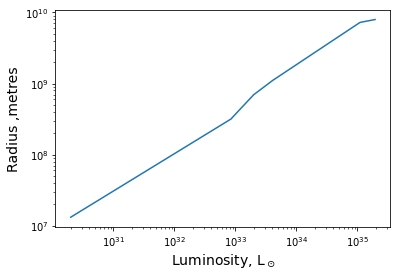

In [8]:
plt.plot(Ms, Rs)
plt.xlabel(r"Luminosity, L$_\odot$", fontsize=14)
plt.ylabel('Radius ,metres',fontsize=14)
plt.xscale('log')
plt.yscale('log')

Text(0, 0.5, 'Temperature in Kelvin')

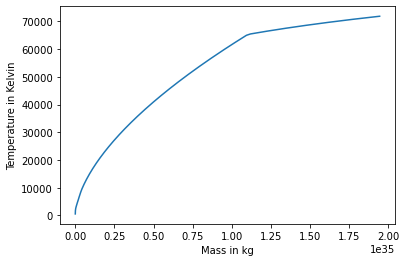

In [9]:
plt.plot(Ms, Ts)
plt.xlabel('Mass in kg')
plt.ylabel('Temperature in Kelvin')

Text(0, 0.5, 'Intensity')

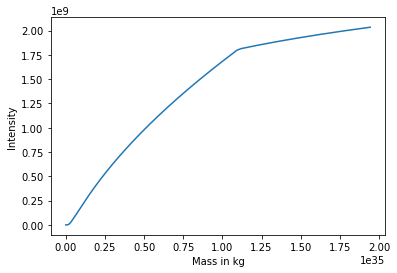

In [10]:
plt.plot(Ms, IntegralofIntensity1) 
plt.xlabel('Mass in kg')
plt.ylabel('Intensity')

In [11]:
print(PARLuminosity(IntegratedIntensity))   

5.082656832404608e+30


Text(0, 0.5, 'Flux in Watts per metre squared')

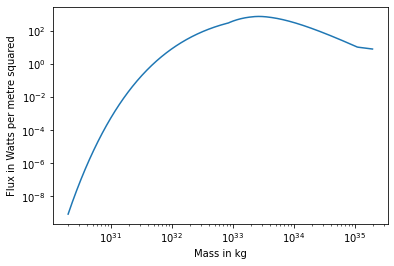

In [12]:
#xs is our Lstar
plt.plot(Ms, FluxPARArray)
plt.xscale("log")
plt.yscale("log")
plt.xlabel('Mass in kg')
plt.ylabel('Flux in Watts per metre squared')